In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

/home/bruce/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
k=pd.read_csv("item_feature2.csv")

In [3]:
ks=pd.DataFrame({'item_id':k.item_id,'cate_level_id':k.cate_level_id,'pv_ipv':k.pv_ipv,'amt_gmv':k.amt_gmv})

In [4]:
grouped=ks.groupby(['item_id','cate_level_id'])

In [5]:
dy=grouped.sum()

In [6]:
dy.to_csv("item_feature3.csv")

In [7]:
ksr=pd.read_csv("item_feature3.csv")

In [8]:
def sd(x): #Standardize
    m=sum(x)/905
    s=np.sqrt(sum(np.square(x-m))/905)
    sd=(x-m)/s
    return sd

In [9]:
sp=sd(ksr.pv_ipv)
sa=sd(ksr.amt_gmv)

In [10]:
ksrf=pd.DataFrame({'item_id':ksr.item_id,'cate_level_id':ksr.cate_level_id,'pv_ipv':sp,'amt_gmv':sa})

In [11]:
clf=KMeans(n_clusters=4) #k=4 is the best from KMeans analysis
data=[ksrf.pv_ipv,ksrf.amt_gmv]
datat=np.transpose(data)
s=clf.fit(datat)
numSamples=len(datat)
label=clf.labels_
print(label)

[3 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 1 0 0 0 0 3 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 3 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 

In [12]:
l=list(label)

In [13]:
f=pd.DataFrame({'item_id':ksrf.item_id,'label':l,'pv_ipv':sp,'amt_gmv':sa})

In [14]:
fd=f.drop(904,axis=0)

In [15]:
group_x=np.array(fd.drop(['item_id','label'],axis=1))

In [16]:
labels_y=np.array(fd.label)

In [17]:
train_x, test_x, train_y, test_y = train_test_split(group_x, labels_y, test_size = 0.3) 

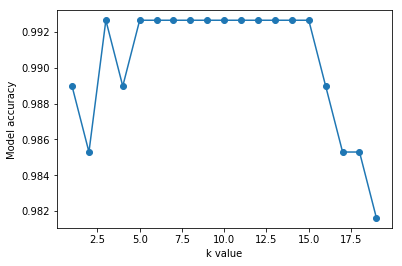

0.9926470588235294


In [18]:
krange = range(1,20)
scores=[]
for i in krange:
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(train_x, train_y)
    kscores=KNN.score(test_x, test_y)
    scores.append(kscores)
plt.plot(krange,scores,'-o')
plt.xlabel('k value')
plt.ylabel('Model accuracy')
plt.show()
print(max(scores))

In [19]:
KNN=KNeighborsClassifier(n_neighbors=6)

In [20]:
KNN.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [21]:
KNN.score(test_x, test_y)

0.9926470588235294

In [22]:
print(KNN.predict([[0.631081,0.732190]]))

[3]
